In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dataset_path = '/content/drive/MyDrive/data'
print("Number of Happy samples:", len(os.listdir(os.path.join(dataset_path, 'happy'))))
print("Number of Sad samples:", len(os.listdir(os.path.join(dataset_path, 'sad'))))
# print(train_generator.class_indices)

Number of Happy samples: 98
Number of Sad samples: 68


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #20% of data
)

##Load the training and validation data


In [5]:
#training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

#validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 134 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


##Model Architecture

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Optimizer

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Training

In [8]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 69s 6s/step - accuracy: 0.6175 - loss: 0.6569 - val_accuracy: 0.5938 - val_loss: 0.6541
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - accuracy: 0.6009 - loss: 0.6326 - val_accuracy: 0.5938 - val_loss: 0.6468
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.5947 - loss: 0.6215 - val_accuracy: 0.5938 - val_loss: 0.6423
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 438ms/step - accuracy: 0.6428 - loss: 0.5893 - val_accuracy: 0.5938 - val_loss: 0.6372
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - accuracy: 0.6804 - loss: 0.5848 - val_accuracy: 0.6562 - val_loss: 0.6294
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.6404 - loss: 0.5958 - val_accuracy: 0.6250 - val_loss: 0.6229
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 413ms/step - accuracy: 0.6565 - loss: 0.5522 - val_accuracy: 0.6562 - val_loss: 0.6148
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 302ms/step - accuracy: 0.7338 - loss: 0.5094 - val_accuracy: 0.6875 - val_loss: 0.6154
Epoch

Callbacks

In [9]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 658ms/step - accuracy: 0.9254 - loss: 0.3087 - val_accuracy: 0.5938 - val_loss: 0.6253 - learning_rate: 1.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.9345 - loss: 0.3022 - val_accuracy: 0.6875 - val_loss: 0.5851 - learning_rate: 1.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.9658 - loss: 0.2917 - val_accuracy: 0.6250 - val_loss: 0.6008 - learning_rate: 1.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.9401 - loss: 0.2866 - val_accuracy: 0.6875 - val_loss: 0.5892 - learning_rate: 1.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 440ms/step - accuracy: 0.9552 - loss: 0.2353 - val_accuracy: 0.6875 - val_loss: 0.5888 - learning_rate: 2.0000e-05


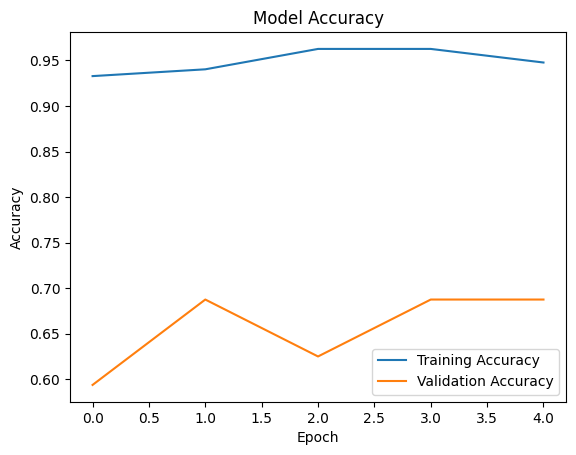

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The image is predicted as: Happy
Confidence: 0.3208


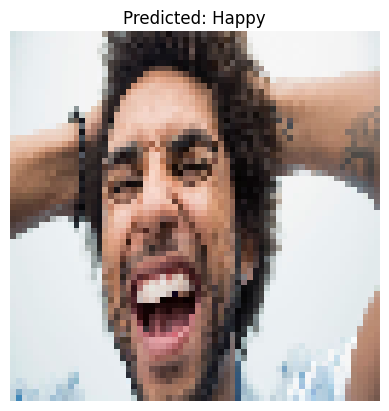

In [20]:
from tensorflow.keras.preprocessing import image

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)

    if prediction < 0.5:
        predicted_class = "Happy"
    else:
        predicted_class = "Sad"

    print(f"The image is predicted as: {predicted_class}")
    print(f"Confidence: {prediction[0][0]:.4f}")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

img_path = '/content/drive/MyDrive/data/happy/Happy_People_Happy_Man.jpg'
predict_image(model, img_path)